In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt

In [3]:
symbol_list = ['^GDAXI', 'NQ=F', '^DJI', '^GSPC', '^IBEX', '^FCHI']
prices = yf.download(symbol_list, start = '2000-12-31', end = '2022-12-31')
prices = prices['Adj Close']
df_changes = prices.pct_change(periods=1)
df_cumsum = df_changes.cumsum()
prices = df_cumsum

[*********************100%***********************]  6 of 6 completed


In [8]:
prices.rename(columns ={'NQ=F':'nq', '^GDAXI': 'dax', '^DJI':'dow' ,'^GSPC': 'SP500', '^IBEX': 'ibex', '^FCHI' : ' cac'},
             inplace = True)

In [5]:
prices.dropna(inplace = True)

In [9]:
prices

,nq,dow,cac,dax,SP500,ibex
Date,,,,,,
2001-01-03,0.167013,0.028142,-0.019805,0.023075,0.050099,0.013293
2001-01-04,0.149816,0.025096,0.003407,0.013997,0.039546,0.056364
2001-01-05,0.072382,0.002149,-0.006560,0.014902,0.013304,0.056802
2001-01-08,0.086116,-0.001664,-0.010940,0.016447,0.011386,0.059114
2001-01-09,0.086547,-0.006259,-0.023083,0.018379,0.015198,0.054771
...,...,...,...,...,...,...
2022-12-08,2.395007,1.544657,0.703410,1.419532,1.555141,0.486751
2022-12-09,2.388503,1.535627,0.707973,1.426974,1.547791,0.494532
2022-12-12,2.400776,1.551417,0.703916,1.422515,1.562071,0.490877


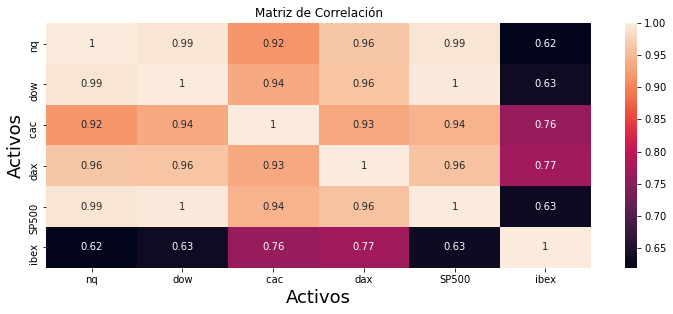

In [10]:
correlation_mat = prices.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True)
plt.title('Matriz de Correlación')
plt.xlabel('Activos',fontsize=18)
plt.ylabel('Activos',fontsize=18)
plt.show()

In [11]:
corr = prices.corr()

In [12]:
corr

,nq,dow,cac,dax,SP500,ibex
nq,1.000000,0.993607,0.917257,0.962025,0.993821,0.618828
dow,0.993607,1.000000,0.935602,0.961154,0.997872,0.632526
cac,0.917257,0.935602,1.000000,0.934628,0.943588,0.762800
dax,0.962025,0.961154,0.934628,1.000000,0.959595,0.771966
SP500,0.993821,0.997872,0.943588,0.959595,1.000000,0.630832
ibex,0.618828,0.632526,0.762800,0.771966,0.630832,1.000000


C:\Users\FRANCI~1\AppData\Local\Temp/ipykernel_21300/2636774123.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<AxesSubplot:>

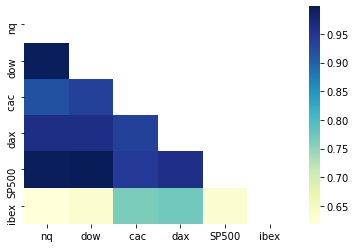

In [16]:
#  Create a mask to hide upper part of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))

#  Create heat map
sns.heatmap(corr, cmap='YlGnBu', mask = mask)

In [ ]:
#  Create a data frame made of our percent changes for each underlying
data = [SPY['pct'], TLT['pct'], GLD['pct'], XRX['pct'], FXB['pct'], AAPL['pct']]
headers = ['SPY', 'TLT', 'GLD', 'XRX', 'FXB', 'AAPL']
pct_frame = pd.concat(data, axis=1, keys=headers)

#  Use the built in pandas function to calculate correlation
corr_frame = pct_frame.corr()
corr_frame